In [2]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=0b6e4ecabd347d33bc23d561cef4e2f51e2ebac2e1ed34a7a3f39706d4a7ab05
  Stored in directory: /home/ubuntu/.cache/pip/wheels/f5/0c/3a/61b992f7aa85de40f339e6d4970d91dddb103dd0ad6c5d58f2
Successfully built imutils
You should consider upgrading via the '/home/ubuntu/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os


In [2]:
INIT_LR = 1e-6
EPOCHS = 25
BS = 8

In [3]:
print("[INFO] Loading images...")
imagePaths = list(paths.list_images("dataset"))
data = []
labels = []

[INFO] Loading images...


In [4]:
#print(imagePaths)

In [5]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    
    data.append(image)
    labels.append(label)

In [6]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [15]:
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [16]:
print(len(trainX))
print(len(testX))

197
50


In [17]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

In [18]:

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
#from google.colab import files

%matplotlib inline

In [29]:

model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    tf.keras.layers.Dense(2, activation='softmax')
])

# to get the summary of the model
model.summary()

# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)       

In [30]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=EPOCHS)

[INFO] training head...
Train on 197 samples, validate on 50 samples
Epoch 1/25
197/197 [==============================] - 3s 16ms/sample - loss: 1.0613 - accuracy: 0.5939 - val_loss: 0.7345 - val_accuracy: 0.6200
Epoch 2/25
197/197 [==============================] - 0s 2ms/sample - loss: 0.6870 - accuracy: 0.6244 - val_loss: 0.6743 - val_accuracy: 0.6200
Epoch 3/25
197/197 [==============================] - 0s 2ms/sample - loss: 0.6755 - accuracy: 0.6244 - val_loss: 0.6720 - val_accuracy: 0.6200
Epoch 4/25
197/197 [==============================] - 0s 2ms/sample - loss: 0.6663 - accuracy: 0.6244 - val_loss: 0.6454 - val_accuracy: 0.6200
Epoch 5/25
197/197 [==============================] - 0s 2ms/sample - loss: 0.6735 - accuracy: 0.6142 - val_loss: 0.9617 - val_accuracy: 0.6200
Epoch 6/25
197/197 [==============================] - 0s 2ms/sample - loss: 0.6627 - accuracy: 0.6244 - val_loss: 0.7066 - val_accuracy: 0.6200
Epoch 7/25
197/197 [==============================] - 0s 2ms/sampl

[INFO] evaluating network...
              precision    recall  f1-score   support

   negatives       0.66      0.94      0.77        31
   positives       0.67      0.21      0.32        19

    accuracy                           0.66        50
   macro avg       0.66      0.57      0.55        50
weighted avg       0.66      0.66      0.60        50

[[29  2]
 [15  4]]
acc: 0.6600
sensitivity: 0.9355
specificity: 0.2105
[INFO] saving Cancer detector model...


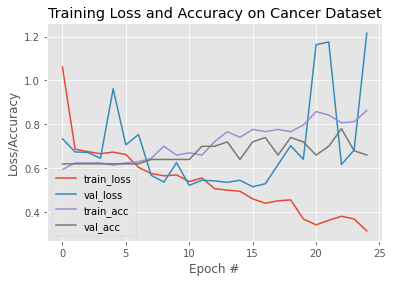

In [31]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Cancer Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

# serialize the model to disk
print("[INFO] saving Cancer detector model...")
model.save("cancer_model.h5", save_format="h5")

In [32]:
!git init

Reinitialized existing Git repository in /home/ubuntu/Untitled Folder/lung_cancer_detector/.git/


In [ ]:
!git push -u origin

Username for 'https://github.com': 